In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from main import HiddenMarkovModel

/home/nicholas/machinelearning-examples/examples/HiddenMarkovModels/HmmModelWithPython/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = "../data/TrackingData.csv"
df = pd.read_csv(data_path)
df

,Velocity,Acceleration,PositionX,PositionY
0,0.000000,0.000000,326.289520,145.868546
1,0.006695,0.185968,326.289582,145.868656
2,0.036535,0.694011,326.290013,145.869426
3,0.116059,1.680101,326.291599,145.872195
4,0.260809,3.045892,326.295488,145.878583
...,...,...,...,...
44808,4.112804,35.831591,117.271109,293.068905
44809,3.555299,35.133771,117.314541,293.087853
44810,3.153675,33.923732,117.354245,293.092396
44811,2.882485,32.239848,117.387893,293.086779


# Initialize HMM

In [3]:
# number of hidden discrete states that the model will use. We are choosing 3 for demo purposes.
num_states = 3
# dimensionality of the data. Since we are using velocity and acceleration, dimensionality is 2.
dimensions = 2
# default type of observations model. See https://github.com/lindermanlab/ssm/blob/6c856ad3967941d176eb348bcd490cfaaa08ba60/ssm/hmm.py#L81 for more.
observations_model_type = "gaussian"
# default type of transitions model. See https://github.com/lindermanlab/ssm/blob/6c856ad3967941d176eb348bcd490cfaaa08ba60/ssm/hmm.py#L51 for more.
transitions_model_type = "stationary"

hmm = HiddenMarkovModel(num_states=num_states, dimensions=dimensions,
                        observations_model_type=observations_model_type, transitions_model_type=transitions_model_type)

# Fit HMM using velocity and acceleration

In [4]:
# variables to estimate.
vars_to_estimate = {
    "initial_state_distribution": False,
    "transitions_params": True,
    "observations_params": True
}
# batch size.
batch_size = len(df)
# max number of training iterations.
max_iter = 100

for observation in zip(df["Velocity"].to_list(), df["Acceleration"].to_list()):
    hmm.fit_async(observation=observation, vars_to_estimate=vars_to_estimate,
                  batch_size=batch_size, max_iter=max_iter)

while True:
    if hmm.get_fit_finished():
        hmm.reset_fit_loop()
        break
    time.sleep(1)

hmm.save_model("../data/hmm_model.pkl")

LP: -365237.1: 100%|██████████| 100/100 [00:12<00:00,  7.78it/s]


# Plotting examples

In [5]:
hmm = HiddenMarkovModel.load_model("../data/hmm_model.pkl")

Text(0.5, 1.0, 'Inferred most probable states')

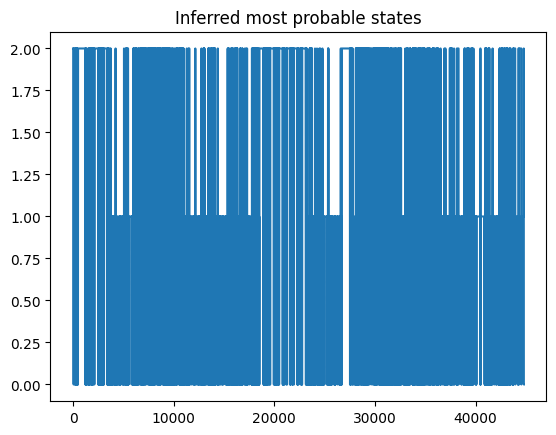

In [6]:
plt.plot(hmm.inferred_most_probable_states)
plt.title("Inferred most probable states")

Text(0.5, 1.0, 'State transition matrix')

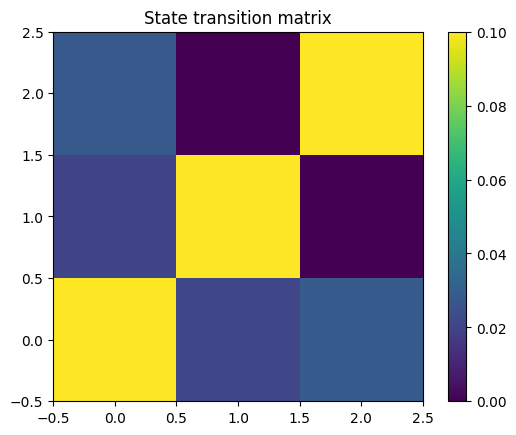

In [7]:
plt.imshow(hmm.transitions.transition_matrix, vmin=0, vmax=0.1, origin="lower")
plt.colorbar()
plt.title("State transition matrix")